# Импортирование библиотек

In [295]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import re
import nltk
import string
from textstat import flesch_reading_ease
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from textblob import TextBlob
import numpy as np
import seaborn as sns
nltk.download('punkt')
nltk.download('stopwords')
import os
from PIL import Image
import matplotlib.image as mpimg

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Открытие файла

In [157]:
with open('ranking_train.jsonl', 'r') as f:
    target = [json.loads(line) for line in f]

rows = []
for d in target:
    text = d['text']
    comments = [c['text'] for c in d['comments']]
    score = [c['score'] for c in d['comments']]
    rows.append({'text': text, 'comments': comments, 'scores':score})

df = pd.DataFrame(rows)

df = df.explode('comments')

unknown = []
for d in target:
    for c in d['comments']:
        unknown.append(c['score'])

df['scores'] = unknown

df.reset_index(drop=True, inplace = True)
df.head()

KeyboardInterrupt: 

# Анализ текста поста

In [ ]:
df.text[20]

Длина текста с пробелами

In [ ]:
df['len_with_spaces_txt'] = [len(i.split(' ')) for i in df.text]

Количество ссылок в тексте публикации

In [ ]:
df['links_txt']=df.text.str.contains('www|http').astype('int')

Количество эмодзи в тексте публикации

In [ ]:
df['emoji_txt']=df.text.str.contains("&#x").astype('int')

Количество упомянутых $ в тексте публикации

In [ ]:
df['money_txt']=df.text.str.contains("$", regex=False).astype('int')

Количество цитат в тексте публикации

In [ ]:
df['quotes_txt']=df.text.str.contains('.*".*".*').astype('int')

Количество вопросов в тексте публикации

In [ ]:
df['quest_txt']=df.text.str.contains('?', regex=False).astype('int')

Количество предложений в тексте публикации

In [ ]:
df['col_sentences_txt'] = df.text.apply(lambda a: len(nltk.sent_tokenize(a)))

Количество слов в тексте публикации

In [ ]:
df['col_words_txt'] = df.text.apply(lambda a: len(nltk.word_tokenize(a)))

Токенизированный текст публикации

In [ ]:
df['tokenized_txt'] = df.text.apply(lambda a: nltk.word_tokenize(a))

Количество стоп-слов в токенизированном тексте

In [ ]:
df['col_stop_words_txt'] = df.tokenized_txt.apply(lambda a: len([w for w in a if w in stop_words]))

Количество знаков пунктуации в тексте

In [ ]:
punc_count_txt = []
for i in df.text:
    punc_count_txt.append(sum(i.count(char) for char in string.punctuation))

In [ ]:
df['punc_count_txt'] = punc_count_txt

Средняя длина слов в тексте

In [ ]:
df['avg_len_words_txt'] = df["text"].apply(lambda x: np.mean([len(w) for w in x.split()]))

In [ ]:
tfidf = TfidfVectorizer()
tfidf.fit(df['text'])

In [ ]:
def tfidf_max_mean(a):
    i = tfidf.transform([a]).T.toarray().reshape(-1)
    return i[i>0.1].mean()

In [ ]:
df['tfidf_maxes_mean_txt'] = df.text.apply(lambda x: tfidf_max_mean(x))
df['tfidf_maxes_mean_txt'] = df['tfidf_maxes_mean_txt'].fillna(0)

In [ ]:
def tfidf_max(a):
    i = tfidf.transform([a]).T.toarray().reshape(-1)
    return i.max()

In [ ]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [ ]:
df['tfidf_max_txt'] = df.text.apply(lambda x: tfidf_max(x))

In [ ]:
df['total_digits_txt'] = df.text.apply(len(re.findall('[0-9]',string)))
df['total_letters_txt'] = df.text.apply(len(re.findall('[A-z]',string)))

# Анализ комментов

Длина комментария с пробелами

In [ ]:
df['len_with_spaces'] = [len(i.split(' ')) for i in df.comments]

Количество ссылок в комментарии

In [ ]:
df['links']=df.comments.str.contains('www|http').astype('int')

Количество эмодзи в комментарии

In [ ]:
df['emoji']=df.comments.str.contains("&#x").astype('int')

Количество упомянутых $ в комментарии

In [ ]:
df['money']=df.comments.str.contains("$", regex=False).astype('int')

Количество цитат в комментарии

In [ ]:
df['quotes']=df.comments.str.contains('.*".*".*').astype('int')

Количество вопросительных знаков в комментарии

In [ ]:
df['quest']=df.comments.str.contains('?', regex=False).astype('int')

Количество предложений в комментарии

In [ ]:
df['col_sentences'] = df.comments.apply(lambda a: len(nltk.sent_tokenize(a)))

Количество слов в комментарии

In [ ]:
df['col_words'] = df.comments.apply(lambda a: len(nltk.word_tokenize(a)))

Токенизированный комментарий

In [ ]:
df['tokenized'] = df.comments.apply(lambda a: nltk.word_tokenize(a))

Количество стоп-слов в токенизированной комментарии

In [ ]:
df['col_stop_words'] = df.tokenized.apply(lambda a: len([w for w in a if w in stop_words]))

In [160]:
display(df.head())
print(f'Размерность полученного DataFrame: {df.shape}')

,text,comments,scores,len_with_spaces_txt,links_txt,emoji_txt,money_txt,quotes_txt,quest_txt,col_sentences_txt,...,col_words,tokenized,col_stop_words,quest_percent,money_percent,polarity,readability,total_digits,total_letters,col_stop_words_txt
0,How many summer Y Combinator fundees decided n...,Going back to school is not identical with giv...,0,23,0,0,0,0,1,2,...,205,"[Going, back, to, school, is, not, identical, ...",89,0.000000,0.0,toxic,80.11,2,783,10
1,How many summer Y Combinator fundees decided n...,There will invariably be those who don't see t...,1,23,0,0,0,0,1,2,...,87,"[There, will, invariably, be, those, who, do, ...",40,0.000000,0.0,good,77.57,0,328,10
2,How many summer Y Combinator fundees decided n...,For me school is a way to be connected to what...,2,23,0,0,0,0,1,2,...,102,"[For, me, school, is, a, way, to, be, connecte...",42,0.009804,0.0,good,81.63,0,387,10
3,How many summer Y Combinator fundees decided n...,I guess it really depends on how hungry you ar...,3,23,0,0,0,0,1,2,...,72,"[I, guess, it, really, depends, on, how, hungr...",32,0.000000,0.0,good,75.24,2,244,10
4,How many summer Y Combinator fundees decided n...,I know pollground decided to go back to school...,4,23,0,0,0,0,1,2,...,14,"[I, know, pollground, decided, to, go, back, t...",4,0.000000,0.0,medium,57.27,0,68,10


Размерность полученного DataFrame: (440535, 33)


In [163]:
print(f'Колонки полученного DataFrame: {list(df.columns)}')

Колонки полученного DataFrame: ['text', 'comments', 'scores', 'len_with_spaces_txt', 'links_txt', 'emoji_txt', 'money_txt', 'quotes_txt', 'quest_txt', 'col_sentences_txt', 'col_words_txt', 'tokenized_txt', 'punc_count_txt', 'avg_len_words_txt', 'tfidf_maxes_mean_txt', 'tfidf_max_txt', 'len_with_spaces', 'links', 'emoji', 'money', 'quotes', 'quest', 'col_sentences', 'col_words', 'tokenized', 'col_stop_words', 'quest_percent', 'money_percent', 'polarity', 'readability', 'total_digits', 'total_letters', 'col_stop_words_txt']


#### Первичный HeatMap с коррелляционной матрицей

<AxesSubplot:>

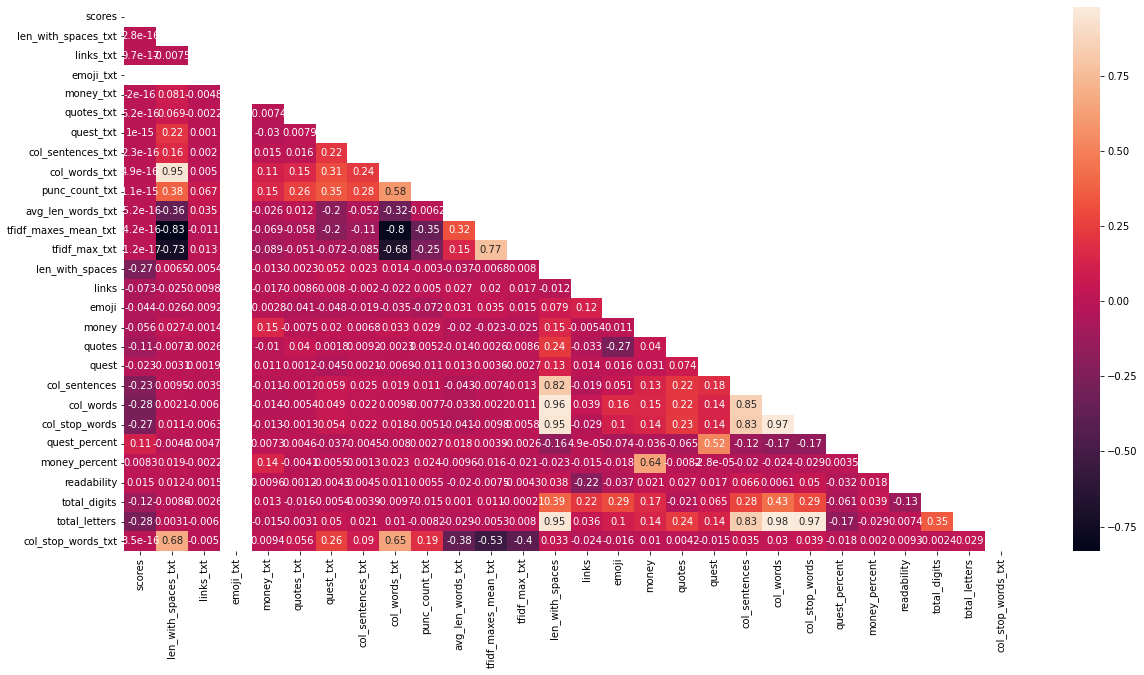

In [165]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), mask = np.triu(df.corr()), annot = True)

# Детальное рассмотрение фичей, формулирование выводов

In [166]:
df.groupby('scores')['len_with_spaces'].median()
#гипотеза 1 - score зависит от длины комментария

scores
0    99.0
1    67.0
2    53.0
3    44.0
4    38.0
Name: len_with_spaces, dtype: float64

In [167]:
df['col_words'].head()

0    205
1     87
2    102
3     72
4     14
Name: col_words, dtype: int64

In [168]:
df['quotes'].head()

0    1
1    0
2    1
3    0
4    0
Name: quotes, dtype: int32

In [169]:
df['len_with_spaces'].head()

0    186
1     76
2     91
3     65
4     14
Name: len_with_spaces, dtype: int64

In [170]:
df['col_words'].head()

0    205
1     87
2    102
3     72
4     14
Name: col_words, dtype: int64

In [171]:
df['quest_percent'] = df['quest'] / df['col_words']
df['money_percent'] = df['money'] / df['col_words']

In [172]:
df.groupby('scores')['quest_percent'].mean()
# меньше вопросов - больший скор, незначащий признак

scores
0    0.003434
1    0.004826
2    0.006157
3    0.007600
4    0.009380
Name: quest_percent, dtype: float64

In [173]:
df.groupby('scores')['quest'].mean()
#мы определили, что длина лучшим образом определяет скор по 0 группе, но что с другими?

scores
0    0.322210
1    0.298319
2    0.293257
3    0.291203
4    0.288059
Name: quest, dtype: float64

In [174]:
df.groupby('scores')['money'].mean().reset_index()
# больше знаков доллар - больше скор, но не факт, что в одном тексте содержится по одному знаку

,scores,money
0,0,0.072037
1,1,0.054547
2,2,0.045615
3,3,0.040848
4,4,0.035843


In [175]:
df.groupby('scores')['money_percent'].mean()
#примерно одинаковое количество, незначительно

scores
0    0.000510
1    0.000562
2    0.000563
3    0.000595
4    0.000607
Name: money_percent, dtype: float64

In [176]:
df.groupby('scores')['quotes'].mean().reset_index()

,scores,quotes
0,0,0.275994
1,1,0.221844
2,2,0.190507
3,3,0.170917
4,4,0.152008


In [177]:
df.groupby('scores')['links'].mean()

scores
0    0.261319
1    0.234476
2    0.215704
3    0.196205
4    0.173709
Name: links, dtype: float64

In [178]:
df.groupby('scores')['emoji'].mean()

scores
0    0.247018
1    0.234363
2    0.221957
3    0.209166
4    0.195467
Name: emoji, dtype: float64

In [179]:
display(df.groupby('scores')['col_words'].median())
display(df.groupby('scores')['col_words'].mean())
#сравнение среднего и медианы количества слов. Возможны выбросы, поскольку медиана 0 практически совпадает со средним 1

scores
0    122.0
1     84.0
2     66.0
3     56.0
4     47.0
Name: col_words, dtype: float64

scores
0    172.201244
1    118.241036
2     95.370379
3     82.110820
4     71.226702
Name: col_words, dtype: float64

#### Визуализация, Boxplots
Имеется большое количество выбросов в группах

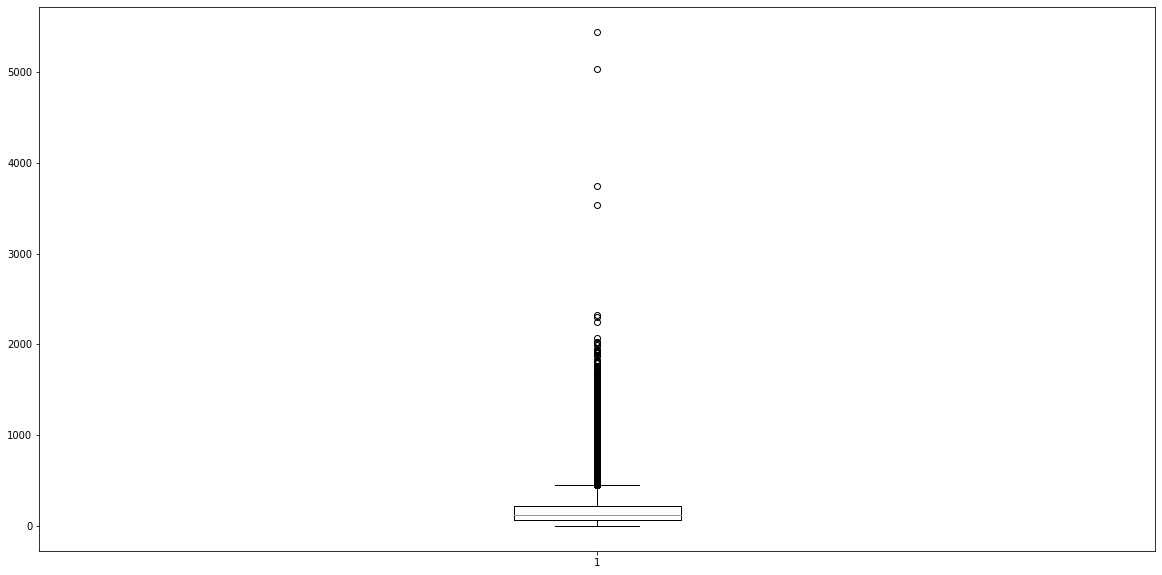

In [180]:
plt.figure(figsize = (20,10))
plt.boxplot(df[df['scores'] == 0]['col_words']);

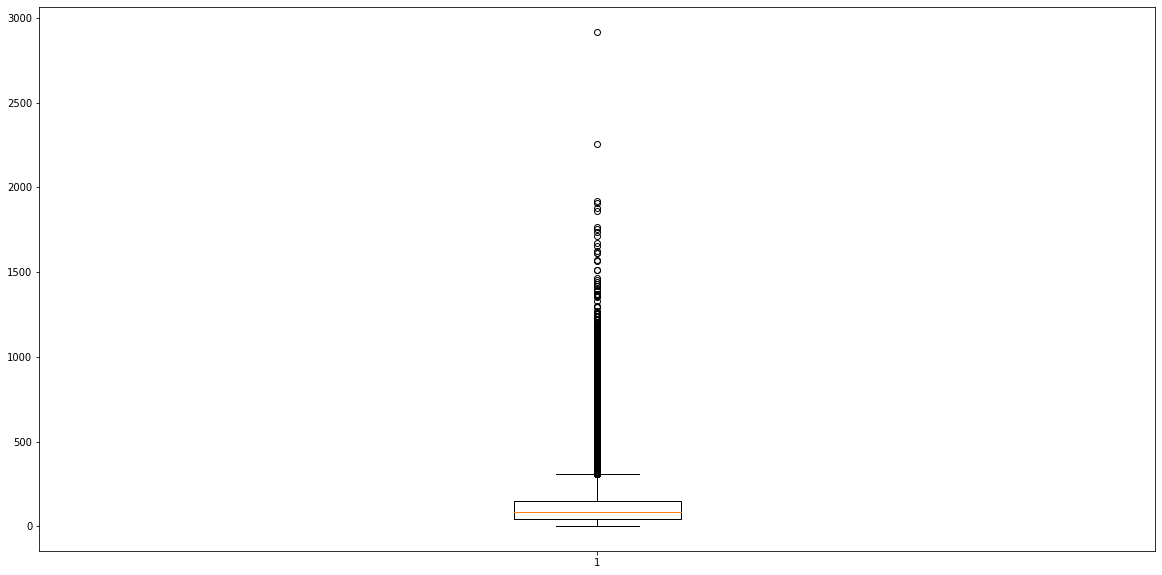

In [181]:
plt.figure(figsize = (20,10))
plt.boxplot(df[df['scores'] == 1]['col_words']);

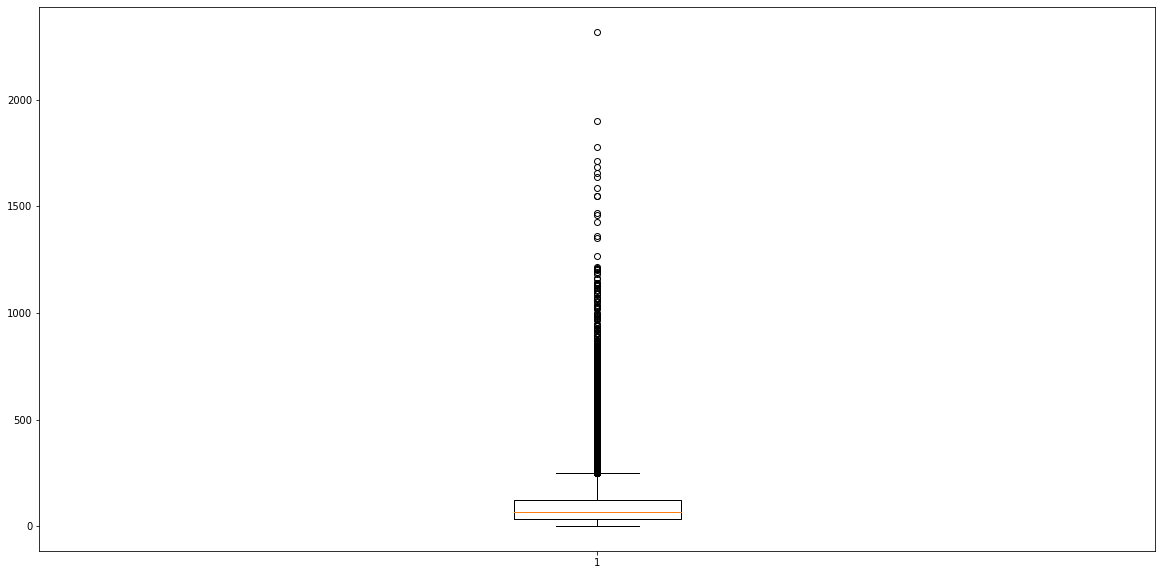

In [182]:
plt.figure(figsize = (20,10))
plt.boxplot(df[df['scores'] == 2]['col_words']);

#### Мы понимаем что количество слов сильно влияет на score
Возьмем `scores` и `количество слов`, отсортируем в порядке убывания по количеству слов и выведем первые 20.000 строк. Увидим,
что большая часть пользователей, кто писал много имеют лучший `score`

In [185]:
df[['scores','col_words']].sort_values('col_words', ascending = False).head(20000)['scores'].value_counts(normalize = True)

0    0.51370
1    0.21440
2    0.12055
3    0.08845
4    0.06290
Name: scores, dtype: float64

In [187]:
df[['scores','col_words']].sort_values('col_words', ascending = False).head(5)

,scores,col_words
36755,0,5441
277320,0,5028
273300,0,3750
231203,3,3718
43985,0,3539


Проведем то же самое, но посмотрим на `score`, отличные от лучшего. Увидим, что количество слов по-прежнему является важным фактором

In [189]:
df[df['scores'].isin([1,2,3,4])][['scores','col_words']].sort_values('col_words', ascending = False).head(20000)['scores'].value_counts(normalize = True)

1    0.41615
2    0.25970
3    0.18430
4    0.13985
Name: scores, dtype: float64

#### Релевантные ссылки
Моделируем ситуацию. Представим, что тексте публикации имеется ссылка, люди же также отвечают на пост с ссылкой. Посмотрим как они распределены по значению `score`

In [194]:
df[(df['links_txt'] == df['links']) & df['links_txt'] == 1].groupby('scores')['links'].sum()
#больше всего ссылок на соотнесении постов и комментариев во 2 группе. Возможно, идут нерелевантные ссылки

scores
0    34
1    27
2    35
3    27
4    17
Name: links, dtype: int32

In [191]:
df[(df['emoji_txt'] == df['emoji'])].groupby('scores')['emoji'].sum()
#нет текстов публикации с эмодзи и комментариями, они никак не связаны. Нет пользователей, которые ответили на пост с эмодзи и без с эмодзи и без

scores
0    0
1    0
2    0
3    0
4    0
Name: emoji, dtype: int32

#### Вопросительный пост
Представим, что публикация содержит знак вопроса, комментарии же также содержать знак вопроса. Посмотрим на то, как они распределены относительно `score` 

In [196]:
df[(df['quest_txt'] == df['quest']) & df['quest_txt'] == 1].groupby('scores')['quest'].sum().reset_index()

,scores,quest
0,0,4886
1,1,4372
2,2,4060
3,3,3890
4,4,3757


#### Максимальное количество слов в тексте публикации

In [197]:
df['len_with_spaces_txt'].max()
#26 слов, посмотрим на то, как соотносятся комментарии с ответов

26

#### Длина коммента и текста
У нас имеется пост публикации с фиксированной длиной, посмотрим как сооотносится `score` при условии того, что длина комментария меньше или равна длине публикации

In [201]:
df[df['len_with_spaces_txt'] >= df['len_with_spaces']]['scores'].value_counts(normalize = True)
#если пишешь меньше, значит попадаешь в выдачу худшую. Человек не полностью раскрыл идею своего коммента

4    0.377272
3    0.259470
2    0.180696
1    0.118806
0    0.063756
Name: scores, dtype: float64

#### Визуализация

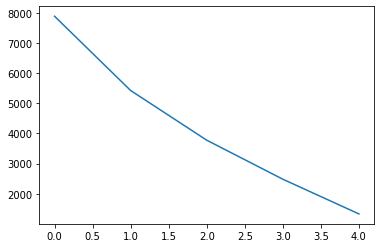

In [203]:
plt.plot(df['scores'].drop_duplicates().to_list(), df[df['len_with_spaces_txt'] >= df['len_with_spaces']]['scores'].value_counts().to_list())

#### Аналогично с количеством цитат, посмотрим на такую же метрику

In [205]:
df[df['quotes_txt'] > df['quotes']]['scores'].value_counts(normalize = True)
#если пишешь столько же цитат, как и в основном датасете, то твой скор становится ниже, однако распределение
#примерно равномерное, что говорит нам об относительной устойчивости

4    0.218065
3    0.212341
2    0.201871
1    0.192657
0    0.175066
Name: scores, dtype: float64

In [206]:
df.head()

,text,comments,scores,len_with_spaces_txt,links_txt,emoji_txt,money_txt,quotes_txt,quest_txt,col_sentences_txt,...,col_words,tokenized,col_stop_words,quest_percent,money_percent,polarity,readability,total_digits,total_letters,col_stop_words_txt
0,How many summer Y Combinator fundees decided n...,Going back to school is not identical with giv...,0,23,0,0,0,0,1,2,...,205,"[Going, back, to, school, is, not, identical, ...",89,0.000000,0.0,toxic,80.11,2,783,10
1,How many summer Y Combinator fundees decided n...,There will invariably be those who don't see t...,1,23,0,0,0,0,1,2,...,87,"[There, will, invariably, be, those, who, do, ...",40,0.000000,0.0,good,77.57,0,328,10
2,How many summer Y Combinator fundees decided n...,For me school is a way to be connected to what...,2,23,0,0,0,0,1,2,...,102,"[For, me, school, is, a, way, to, be, connecte...",42,0.009804,0.0,good,81.63,0,387,10
3,How many summer Y Combinator fundees decided n...,I guess it really depends on how hungry you ar...,3,23,0,0,0,0,1,2,...,72,"[I, guess, it, really, depends, on, how, hungr...",32,0.000000,0.0,good,75.24,2,244,10
4,How many summer Y Combinator fundees decided n...,I know pollground decided to go back to school...,4,23,0,0,0,0,1,2,...,14,"[I, know, pollground, decided, to, go, back, t...",4,0.000000,0.0,medium,57.27,0,68,10


Равномерное распределение `score` во всем датасете, дисбаланса классов нет, поэтому не нужно использовать синтетические данные или другие методы для фикса

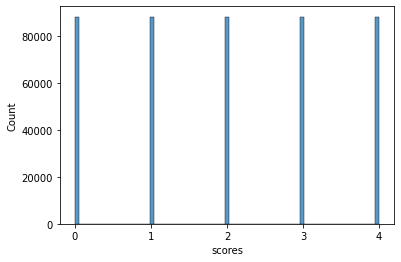

In [209]:
sns.histplot(df['scores'])
plt.xticks(np.arange(0,5,1));

#### Посмотрим на количество предложений аналогичным способом

In [212]:
df[df['col_sentences_txt'] >= df['col_sentences']]['scores'].value_counts(normalize = True)
#пользователь может ответить кратко, но не раскрыть полностью свой комментарий, например, если это ответ на вопрос.
#большие скоры составляют <30%, что говорит нам о том, что данная гипотеза имеет право на существование

4    0.276876
3    0.240473
2    0.205472
1    0.164597
0    0.112582
Name: scores, dtype: float64

#### Рассмотрим количество слов в тексте публикации и комментариях

In [214]:
df[df['col_words_txt'] >= df['col_words']]['scores'].value_counts(normalize = True)
#скорее всего, пользователи, которые полностью не раскрывают свой комметарий 
#(в наше случае пишут меньше слов, попадают в худшую выдачу). Примерно 13% данных относится к высоким скорам

4    0.426740
3    0.261538
2    0.167106
1    0.099634
0    0.044982
Name: scores, dtype: float64

#### Визуализация

<AxesSubplot:>

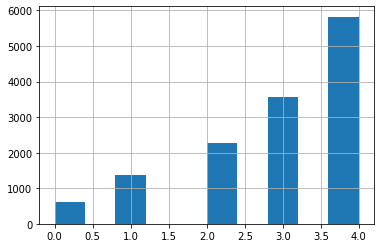

In [215]:
df[df['col_words_txt'] >= df['col_words']]['scores'].hist()

#### Предположим, что текст публикации содержит знак `$`, посмотрим как соотносятся следующий показатель. 
Смоделируем ситуацию: текст публикации содержит информацию по стоимости какого-то объекта, в свою очередь в комментарии может описываться несколько вариантов, т.е. более подробно описывать другие варианты

In [218]:
df[df['money_txt'] < df['money']]['scores'].value_counts(normalize = True)

0    0.294148
1    0.217921
2    0.183020
3    0.163950
4    0.140961
Name: scores, dtype: float64

In [219]:
sizes = df[df['money_txt'] < df['money']]['scores'].value_counts().to_list()
labels = df.scores.drop_duplicates().to_list()

#### Визуализация

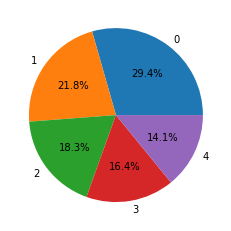

In [221]:
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%');

#### Рассмотрим вопросительный текст публикации. 
В комментарии предложено больше вариантов решения со знаком $, посмотрим на количество данных

In [224]:
df[(df['quest_txt'] == 1) & (df['money_txt'] < df['money'])]['scores'].value_counts(normalize = True)
#данных не так много, но пользователи могут отвечать более развернуто, что в свою очередь влияет на score

0    0.294024
1    0.217905
2    0.186549
3    0.168144
4    0.133379
Name: scores, dtype: float64

#### Визуализация

<AxesSubplot:xlabel='scores', ylabel='Count'>

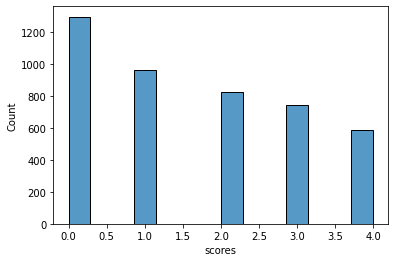

In [227]:
sns.histplot(df[(df['quest_txt'] == 1) & (df['money_txt'] < df['money'])]['scores'])

Если больше длина комментария, то может быть больше эмодзи в комментариях, но это не показатель, данные распределены равномерно

In [228]:
df[(df['quest_txt'] == 1) & (df['emoji'] >= 1)]['scores'].value_counts(normalize = True)

0    0.222697
1    0.211918
2    0.200868
3    0.190970
4    0.173548
Name: scores, dtype: float64

Аналогично проделаем с публикациями, где есть упоминание `$` и эмодзи в комментариях также есть. Данные распределены относительно равномерно

In [229]:
df[(df['money_txt'] == 1) & (df['emoji'] >= 1)]['scores'].value_counts(normalize = True)

0    0.224065
1    0.207908
2    0.199830
3    0.186650
4    0.181548
Name: scores, dtype: float64

Рассмотрим количество слов в комментариях, увидим, что максимальное количество слов - 5441, относится к 0 score

In [244]:
print(f'Статистка количества слов в датасете: {df.col_words.describe()}')
print(f'score с максимальных количеством слов в датасете: {df[df.col_words == df.col_words.max()].scores.to_list()}')

Статистка количества слов в датасете: count    440535.000000
mean        107.830036
std         121.835097
min           1.000000
25%          36.000000
50%          71.000000
75%         135.000000
max        5441.000000
Name: col_words, dtype: float64
score с максимальных количеством слов в датасете: [0]


#### Для того, чтобы уравнять score друг с другом, рассмотрим метод фильтрации с IQR по количеству слов

In [248]:
iqr_per_words = np.quantile(df['col_words'], 0.75) - np.quantile(df['col_words'], 0.25)
high_value_words = np.quantile(df['col_words'], 0.75) + 1.5 * (iqr_per_words)
low_value_words = np.quantile(df['col_words'], 0.25) - 1.5 * (iqr_per_words)

In [250]:
df[(df['col_words'] > low_value_words) & (df['col_words'] < high_value_words) & (df['emoji'] >= 1)]['scores'].value_counts(normalize = True)
#получили равномерное распределение, рассмотрим то же самое, но с другими метриками

1    0.210167
2    0.207823
3    0.200111
0    0.192560
4    0.189339
Name: scores, dtype: float64

In [251]:
df[(df['col_words'] > low_value_words) & (df['col_words'] < high_value_words) & (df['emoji'] >= df['emoji_txt'])]['scores'].value_counts(normalize = True)
#равномерное распределение

4    0.209459
3    0.207673
2    0.204896
1    0.198477
0    0.179496
Name: scores, dtype: float64

In [254]:
df[(df['col_words'] > low_value_words) & (df['col_words'] < high_value_words) & (df['links_txt'] >= df['links'])]['scores'].value_counts(normalize = True)
#равномерное распределение

4    0.219886
3    0.212106
2    0.204391
1    0.193372
0    0.170245
Name: scores, dtype: float64

In [256]:
df[(df['col_words'] > low_value_words) & (df['col_words'] < high_value_words) & (df['col_words'] <= df['col_words_txt'])]['scores'].value_counts(normalize = True)
#здесь видим, что фильтрация не поменяла метрику, а значит количество слов в комментарии значительно влияет на score

4    0.426740
3    0.261538
2    0.167106
1    0.099634
0    0.044982
Name: scores, dtype: float64

#### Тональность текста

In [ ]:
def sentiment_analysis(comment):
    comment = TextBlob(comment).sentiment.polarity
    if comment<0:
        return 'toxic'
    elif comment==0:
        return 'medium'
    else:
        return 'good'
    
df["polarity"] = df["comments"].apply(lambda x: comment(x))


In [225]:
df.head()

,text,comments,scores,len_with_spaces_txt,links_txt,emoji_txt,money_txt,quotes_txt,quest_txt,col_sentences_txt,...,col_words,tokenized,col_stop_words,quest_percent,money_percent,polarity,readability,total_digits,total_letters,col_stop_words_txt
0,How many summer Y Combinator fundees decided n...,Going back to school is not identical with giv...,0,23,0,0,0,0,1,2,...,205,"[Going, back, to, school, is, not, identical, ...",89,0.000000,0.0,toxic,80.11,2,783,10
1,How many summer Y Combinator fundees decided n...,There will invariably be those who don't see t...,1,23,0,0,0,0,1,2,...,87,"[There, will, invariably, be, those, who, do, ...",40,0.000000,0.0,good,77.57,0,328,10
2,How many summer Y Combinator fundees decided n...,For me school is a way to be connected to what...,2,23,0,0,0,0,1,2,...,102,"[For, me, school, is, a, way, to, be, connecte...",42,0.009804,0.0,good,81.63,0,387,10
3,How many summer Y Combinator fundees decided n...,I guess it really depends on how hungry you ar...,3,23,0,0,0,0,1,2,...,72,"[I, guess, it, really, depends, on, how, hungr...",32,0.000000,0.0,good,75.24,2,244,10
4,How many summer Y Combinator fundees decided n...,I know pollground decided to go back to school...,4,23,0,0,0,0,1,2,...,14,"[I, know, pollground, decided, to, go, back, t...",4,0.000000,0.0,medium,57.27,0,68,10


Посмотрим на соотношение различной тональности комментариев к общему количеству элементов в `score`

In [277]:
test = df.groupby(['scores','polarity'])['text'].count().reset_index()
test['all'] = df['scores'].value_counts()[0]
test['percent'] = test['text'] / test['all']

In [286]:
display(test.head())
print(f'Размерность полученного датафрейма: {test.shape}')

,scores,polarity,text,all,percent
0,0,good,69637,88107,0.790369
1,0,medium,4318,88107,0.049009
2,0,toxic,14152,88107,0.160623
3,1,good,66195,88107,0.751302
4,1,medium,6942,88107,0.078791


Размерность полученного датафрейма: (15, 5)


In [283]:
test[test['polarity'] == 'good'].sort_values('percent', ascending = False)
#положительный комментарий может определять скор в группе 0 сосредоточено ~80% положительных комментариев, в 4 ~ 66%

,scores,polarity,text,all,percent
0,0,good,69637,88107,0.790369
3,1,good,66195,88107,0.751302
6,2,good,63689,88107,0.722860
9,3,good,61247,88107,0.695143
12,4,good,58687,88107,0.666088


In [288]:
test[test['polarity'] == 'medium'].sort_values('percent', ascending = False)
#нейтральный комментарий не позволяет определить конкретную позицию, поэтому score может снижаться

,scores,polarity,text,all,percent
13,4,medium,13942,88107,0.158239
10,3,medium,11487,88107,0.130376
7,2,medium,9166,88107,0.104033
4,1,medium,6942,88107,0.078791
1,0,medium,4318,88107,0.049009


In [289]:
test[test['polarity'] == 'toxic'].sort_values('percent', ascending = False)
#плохих комментариев примерно одинаковое количество, равномерное распределение

,scores,polarity,text,all,percent
14,4,toxic,15478,88107,0.175673
11,3,toxic,15373,88107,0.174481
8,2,toxic,15252,88107,0.173108
5,1,toxic,14970,88107,0.169907
2,0,toxic,14152,88107,0.160623


#### Читабельность текста

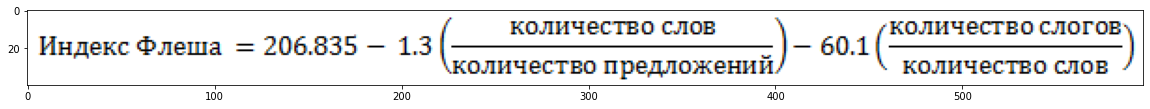

In [298]:
plt.figure(figsize = (20,10))
img = mpimg.imread('C:/Users/User/Downloads/FleshIndx.png')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
df["readability"] = df["comments"].apply(lambda x: flesch_reading_ease(x))

In [299]:
df['readability'].head()

0    80.11
1    77.57
2    81.63
3    75.24
4    57.27
Name: readability, dtype: float64

Рассмотрим читабельность текста и их распределение относительно `score`

In [300]:
df.groupby('scores')['readability'].mean()
#читабельность везде примерно одинаковая, надо посмотреть на количество комментариев, 
#где было написано достаточно много текста, предварительно все в порядке

scores
0    58.320771
1    59.901954
2    59.720767
3    60.542933
4    61.693730
Name: readability, dtype: float64

In [301]:
df[['scores','col_words','readability']].sort_values('col_words', ascending = False).head(20000).groupby('scores')['readability'].median()
#все тексты читабельны, проблем нет

scores
0    63.49
1    63.70
2    63.93
3    63.90
4    64.54
Name: readability, dtype: float64

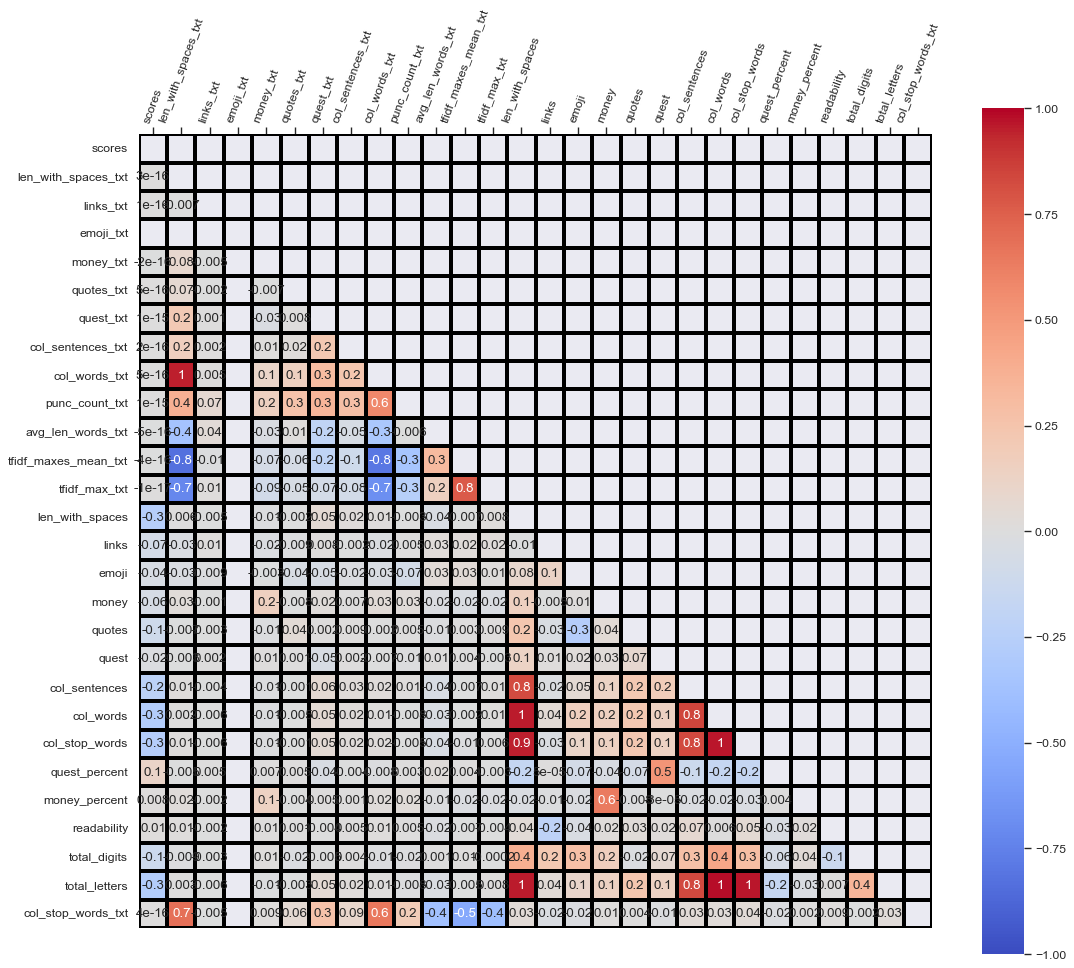

In [304]:
plt.figure(figsize=(16, 14), dpi=80)

ax = sns.heatmap(df.corr(), 
            cmap='coolwarm',
            annot=True,
            linewidths=2,
            linecolor='black',
            square=True,
            mask = np.triu(df.corr()),
            fmt='.1g',
            vmin=-1,
            vmax=1)

ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()
sns.set(font_scale=1)

plt.xticks(rotation=70)
plt.savefig('heatmap.png')